<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [48]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [49]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm





from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [50]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [51]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [52]:
boston_df.head()
#print first first five rows

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [53]:
boston_df.dtypes
#Display the data types of each column.

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object

In [54]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [55]:
boston_df.isnull().sum()
#Check for missing values in each column.

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [56]:
#Check for duplicate rows.
boston_df.duplicated().sum()

0

In [57]:
boston_df[boston_df.duplicated()]


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


In [70]:
boston_df.corr()
#correlation matrix

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


In [71]:
boston_df.describe()
#descriptive statistics of the dataset.

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


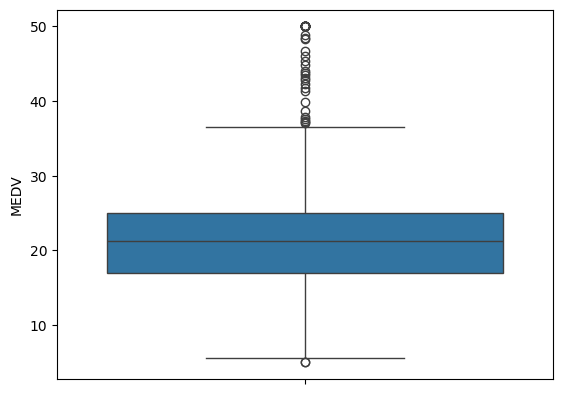

In [72]:
sns.boxplot(boston_df['MEDV'])
pyplot.show()
#boxplot for MEDV (Median value of owner-occupied homes).

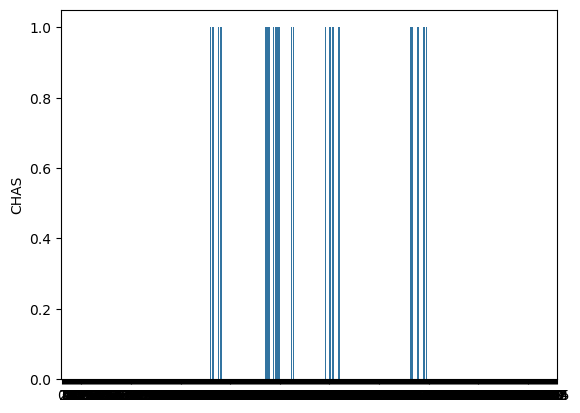

In [73]:
sns.barplot(boston_df['CHAS'])
pyplot.show()

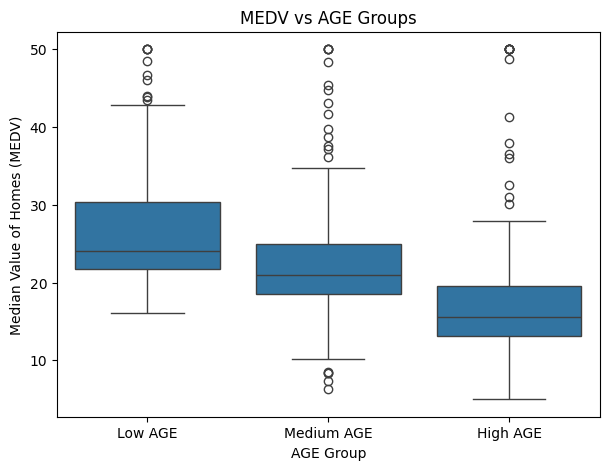

In [77]:
boston_df['AGE_Group'] = pd.qcut(
    boston_df['AGE'],
    q=3,
    labels=['Low AGE', 'Medium AGE', 'High AGE']
)
pyplot.figure(figsize=(7, 5))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
pyplot.title('MEDV vs AGE Groups')
pyplot.xlabel('AGE Group')
pyplot.ylabel('Median Value of Homes (MEDV)')
pyplot.show()

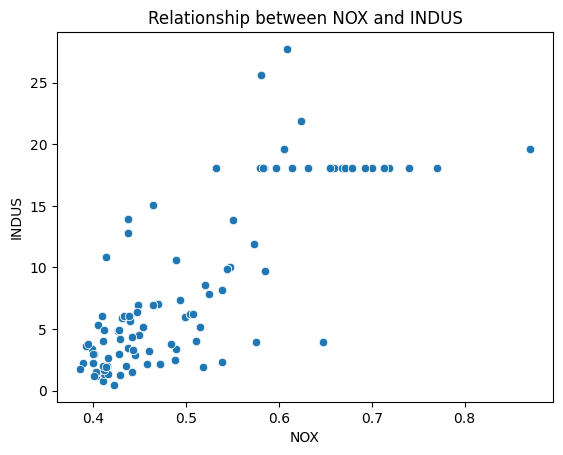

In [82]:
sns.scatterplot(x='NOX', y='INDUS',data= boston_df)

pyplot.title('Relationship between NOX and INDUS')
pyplot.show()

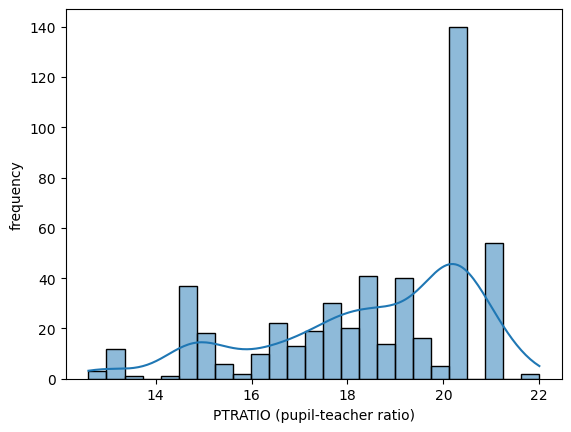

In [91]:
#histogram for PTRATIO (pupil-teacher ratio)
sns.histplot(boston_df['PTRATIO'], bins =25, kde=True)
pyplot.xlabel('PTRATIO (pupil-teacher ratio)')
pyplot.ylabel('frequency')
pyplot.show()

In [99]:
#H0 = Variances are equal
#H1 = Variances are not equal
from scipy.stats import levene
medv_chas_1 = boston_df[boston_df['CHAS']== 1]['MEDV']
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

stat, p_value = levene(medv_chas_1, medv_chas_0)
stat, p_value
if p_value > 0.05:
   print('Variances are equal')
else :
   print('Variances are not equal')

Variances are not equal


In [102]:
#H₀: Mean MEDV is the same
#H₁: Mean MEDV is different
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    medv_chas_1,
    medv_chas_0,
    equal_var=True  # based on Levene’s test
)
t_stat, p_value
if p_value > 0.05:
   print('significant difference')
else :
   print('No significant difference')

No significant difference


In [104]:
#ANOVA test to compare MEDV among the three AGE groups created earlier.
from scipy.stats import f_oneway

low = boston_df[boston_df['AGE_Group'] == 'Low AGE']['MEDV']
medium = boston_df[boston_df['AGE_Group'] == 'Medium AGE']['MEDV']
high = boston_df[boston_df['AGE_Group'] == 'High AGE']['MEDV']

f_stat, p_value = f_oneway(low, medium, high)
f_stat, p_value


(41.440210293126825, 2.1897200799686352e-17)

In [105]:
#Perform a Pearson correlation test to assess the relationship between NOX and INDUS.
from scipy.stats import pearsonr

corr, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])
corr, p_value


(0.7636514469209192, 7.913361061210442e-98)

In [106]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)  # adds intercept
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           1.21e-08
Time:                        09:26:59   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""